In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree
import re


In [ ]:
def extract_named_entities(text):
    entities = {'PERSON': [], 'ORGANIZATION': [], 'GPE': []}
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    for subtree in chunked:
        if isinstance(subtree, Tree):
            label = subtree.label()
            entity = " ".join(token for token, _ in subtree.leaves())
            if label in entities:
                entities[label].append(entity)
    return entities

In [3]:
# Sample extendable skill set
common_skills = set([
    'Python', 'Java', 'SQL', 'Excel', 'Machine Learning', 'Communication',
    'Deep Learning', 'Project Management', 'Leadership', 'NLP', 'TensorFlow',
    'Pandas', 'R', 'C++', 'Git', 'Data Visualization', 'Tableau'
])


In [4]:
def extract_skills(text):
    tokens = set(word_tokenize(text))
    return list(common_skills.intersection(tokens))


In [5]:
import pandas as pd

df = pd.read_csv('D:\\EduNet\\NSTI Indore\\AI\\NLP\\Dataset\\Resume.csv')
df = df[['ID','Resume_str','Category']]
df.to_csv('ResumeLab3.2.csv')


In [6]:
sample_text = df['Resume_str'].iloc[0]
ner_result = extract_named_entities(sample_text)
skills_result = extract_skills(sample_text)
category = df['Category'].iloc[0]
print("Target Job Category:", category)
print("\nNamed Entities:")
print(ner_result)
print("\nExtracted Skills:")
print(skills_result)


Target Job Category: HR

Named Entities:
{'PERSON': ['Client', 'Accomplishments Missouri', 'Manager Training', 'Hilton OnQ', 'Micros Opera PMS', 'Fidelio OPERA', 'Holidex Completed', 'Experience HR', 'Current Company Name', 'Advanced Medical Claims Analyst Mar', 'Manager Jun', 'Hired', 'Executive Support', 'State', 'Marketing', 'Front Office Manager', 'Partner Dec', 'Business', 'Jefferson College', 'School Diploma', 'College Prep', 'State', 'Jefferson College Skills Accounting', 'Marketing'], 'ORGANIZATION': ['ASSOCIATE', 'Customer Service Management', 'IHG', 'Segment Hilton', 'ORS', 'State Helps', 'Administers', 'State Reviewed', 'CPT', 'State', 'Commerce', 'Customer Service', 'Human Resources', 'State', 'State', 'State Education', 'State Business Administration', 'American Shrubel Leadership', 'Customer Service', 'Human Resources'], 'GPE': ['Hospitality', 'Customer', 'Facebook', 'Executive']}

Extracted Skills:
['Leadership']


In [8]:
results = []
for idx, row in df.head(10).iterrows():
    text = row['Resume_str']
    ner = extract_named_entities(text)
    skills = extract_skills(text)
    results.append({
        "ID": row['ID'],
        "Category": row['Category'],
        "Skills": skills,
        "Entities": ner
    })
results_df = pd.DataFrame(results)
results_df.head()


,ID,Category,Skills,Entities
0,16852973,HR,[Leadership],"{'PERSON': ['Client', 'Accomplishments Missour..."
1,22323967,HR,[Communication],"{'PERSON': ['Marketing', 'Current HR Specialis..."
2,33176873,HR,"[Leadership, Excel]","{'PERSON': ['Benefit Administration Policy', '..."
3,27018550,HR,[Excel],"{'PERSON': ['Dynamic', 'Solid', 'Skills Type',..."
4,17812897,HR,[Excel],"{'PERSON': ['Skill Highlights HR', 'Advocacy H..."


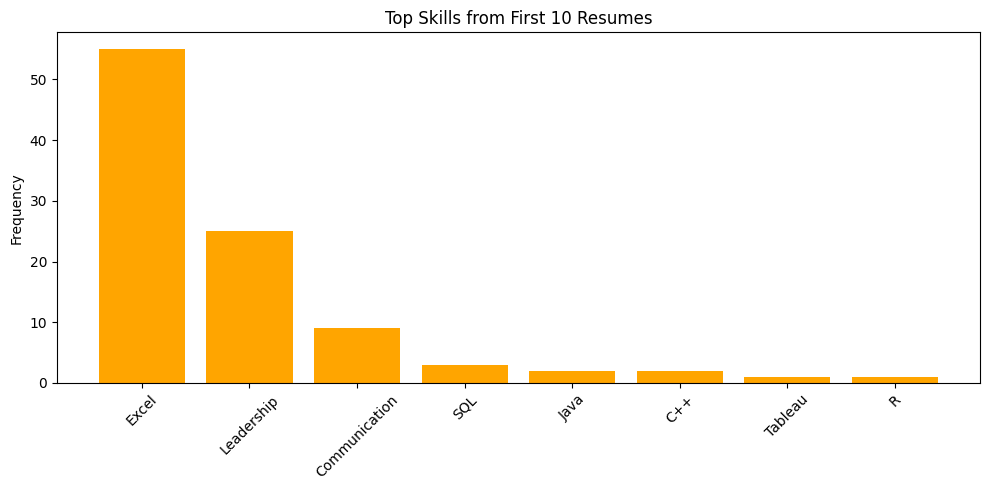

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

all_skills = []
for item in results_df['Skills']:
    all_skills.extend(item)

skill_freq = Counter(all_skills)
top_skills = skill_freq.most_common(10)

labels, values = zip(*top_skills)

plt.figure(figsize=(10,5))
plt.bar(labels, values, color='orange')
plt.title("Top Skills from First 10 Resumes")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
